In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **Load Data Set**

In [71]:
# Load the data
df = pd.read_csv('../data_5KNN.csv')

# Transform it into numpy array
data = df.to_numpy()

In [93]:
# Get the variables
X = data[:,1:]
y = data[:,0]

# Shape
[n, p] = np.shape(X)

In [134]:
## Train and Test set just to see things
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

# **OLS**

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_val)

In [150]:
# Compute RMSE
rmse_ols = np.sqrt(mean_squared_error(y_val, y_pred_ols))
print(f"OLS RMSE is: {rmse_ols:.2f}")

OLS RMSE is: 45.01


# **Ridge Regression**

In [373]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a range of lambda (alpha) values to test
lambda_values = np.logspace(-3, 3, 100)  # 100 values from 10⁻³ to 10³

# Initialize scaler
scaler = StandardScaler()

# Define a pipeline that includes normalization and regression to indtroduce in the GridSearchCV
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('ridge', Ridge())             # Apply Ridge Regression
])

# We need a dictionary as an input for the parameters
param_lambda_values = {'ridge__alpha' : lambda_values}

# Perform GridSearchCV to find the best lambda (alpha in this case)
ridge_cv = GridSearchCV(estimator=ridge_pipeline, param_grid=param_lambda_values, scoring='neg_mean_squared_error', cv=4)
ridge_cv.fit(X_train, y_train)  # it is using the normalized data stablished in the pipeline

# Get the best lambda
best_lambda = ridge_cv.best_params_['ridge__alpha']
print(f"Best lambda for Ridge: {best_lambda}")

# Fit Ridge with the best lambda
best_ridge = Ridge(alpha=best_lambda)
best_ridge.fit(scaler.fit_transform(X_train), y_train)  # Transform X_train before fitting

Best lambda for Ridge: 4.9770235643321135


Ridge(alpha=4.9770235643321135)

## **Prediction**

In [377]:
# Make predictions on validation set
y_pred_ridge = best_ridge.predict(scaler.transform(X_val))
# Compute RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
print(f"OLS RMSE is: {rmse_ridge:.2f}")

OLS RMSE is: 34.38


## **Plots**

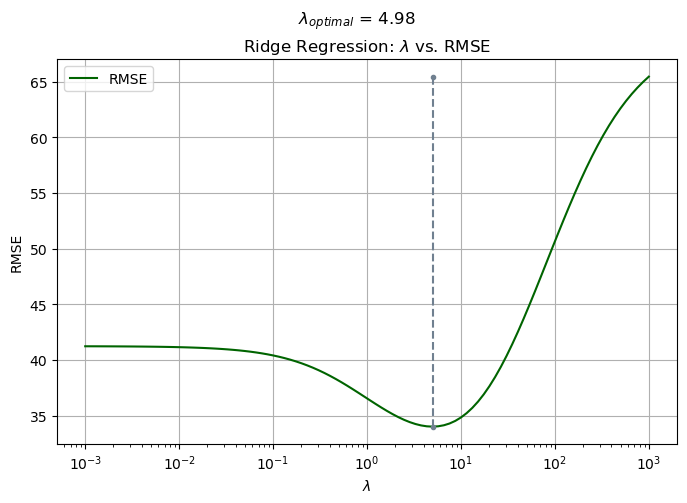

In [355]:
mse_scores = -ridge_cv.cv_results_['mean_test_score']
rmse_scores = np.sqrt(mse_scores)

plt.figure(figsize=(8, 5))
plt.plot(lambda_values, rmse_scores, color='darkgreen', linestyle='-', label='RMSE')
plt.semilogx([best_lambda, best_lambda], [np.min(rmse_scores), np.max(rmse_scores)], marker = ".", linestyle = '--', color='slategray')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel(r"$\lambda$")
plt.ylabel("RMSE")
plt.suptitle(rf"$\lambda_{{optimal}}$ = {best_lambda:.2f}", fontsize=12)
plt.title(r"Ridge Regression: $\lambda$ vs. RMSE")
plt.legend()
plt.grid()
plt.show()

# **Lasso Regression**

# **Elastic Net Regression** 